# Flower Classifier 
### This project aims to build a flower classifier using Keras CNN model

In [2]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load data to appropriate sets

In [33]:
train_path = "C:/Users/ramin/Downloads/flowers_dataset/flowers/train"
test_path = "C:/Users/ramin/Downloads/flowers_dataset/flowers/test"
valid_path = "C:/Users/ramin/Downloads/flowers_dataset/flowers/valid"
gen = ImageDataGenerator()

train_batches = gen.flow_from_directory(directory=train_path,
                                                 target_size=(224,224),
                                                 classes=['daisy','dandelion','rose','sunflower','tulip'],
                                                 batch_size=10)

test_batches = gen.flow_from_directory(directory=test_path,
                                                 target_size=(224,224),
                                                 classes=['daisy','dandelion','rose','sunflower','tulip'],
                                                 batch_size=5)

valid_batches = gen.flow_from_directory(directory=valid_path,
                                                 target_size=(224,224),
                                                 classes=['daisy','dandelion','rose','sunflower','tulip'],
                                                 batch_size=5)

Found 3063 images belonging to 5 classes.
Found 840 images belonging to 5 classes.
Found 414 images belonging to 5 classes.


In [34]:
# function to plot images with labels
def plots(ims,figsize=(24,12), rows=1,interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims= ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows +1
        for i in range(len(ims)):
            sp= f.add_subplot(rows,cols,i+1)
            sp.axis('Off')
            if titles is not None: 
                sp.set_title(titles[i], fontsize=10)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

In [35]:
imgs,labels = next(train_batches)

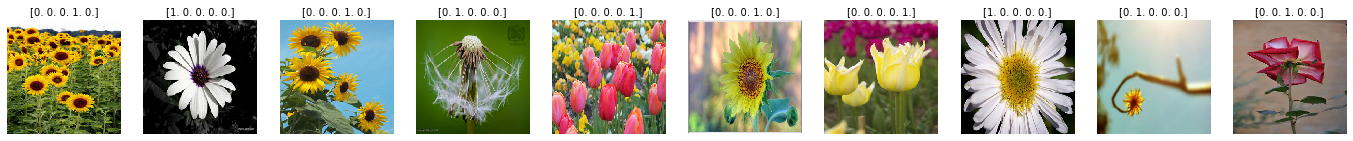

In [36]:
plots(imgs,titles=labels)

## Build and train CNN model

In [37]:
model = Sequential([
    Conv2D(64,(3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(5,activation='softmax')
])

In [38]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(train_batches, steps_per_epoch=9,
                        validation_data=valid_batches, validation_steps=4,epochs=15,verbose=2)

Epoch 1/15
9/9 - 2s - loss: 38669.3125 - accuracy: 0.2000 - val_loss: 16554.9258 - val_accuracy: 0.3500 - 2s/epoch - 192ms/step
Epoch 2/15
9/9 - 1s - loss: 11193.1592 - accuracy: 0.2667 - val_loss: 5653.2095 - val_accuracy: 0.2500 - 1s/epoch - 139ms/step
Epoch 3/15
9/9 - 1s - loss: 3491.3667 - accuracy: 0.1778 - val_loss: 820.0501 - val_accuracy: 0.2500 - 1s/epoch - 141ms/step
Epoch 4/15
9/9 - 1s - loss: 554.2452 - accuracy: 0.4667 - val_loss: 522.0026 - val_accuracy: 0.3000 - 1s/epoch - 137ms/step
Epoch 5/15
9/9 - 1s - loss: 207.8003 - accuracy: 0.5222 - val_loss: 211.2856 - val_accuracy: 0.5000 - 1s/epoch - 144ms/step
Epoch 6/15
9/9 - 1s - loss: 132.3289 - accuracy: 0.4333 - val_loss: 99.0895 - val_accuracy: 0.4000 - 1s/epoch - 144ms/step
Epoch 7/15
9/9 - 1s - loss: 386.5027 - accuracy: 0.4000 - val_loss: 255.3355 - val_accuracy: 0.4000 - 1s/epoch - 140ms/step
Epoch 8/15
9/9 - 1s - loss: 241.0927 - accuracy: 0.3889 - val_loss: 252.7165 - val_accuracy: 0.5000 - 1s/epoch - 143ms/step
E

## Predict

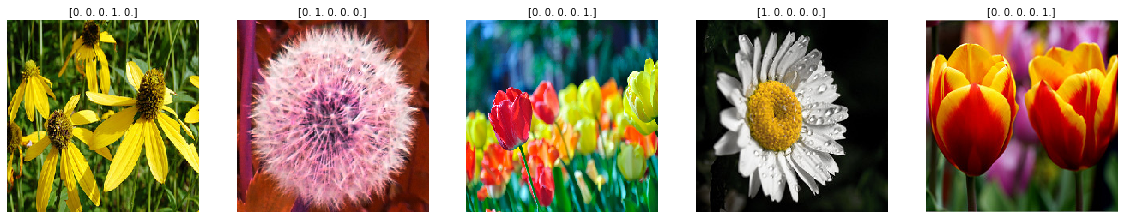

In [40]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [42]:
y_test_arg=np.argmax(test_labels,axis=1)
Y_pred = np.argmax(model.predict(test_batches, steps=1,verbose=0),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
print(cm)

Confusion Matrix
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 1]]


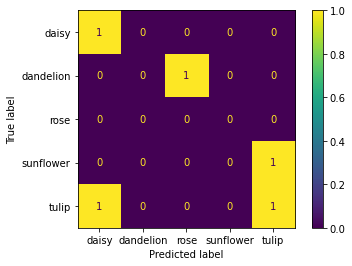

In [43]:
# plotting the confusion matrix 
labels = ['daisy', 'dandelion','rose','sunflower','tulip']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

## Build Fine-tuned VGG16 model



In [44]:
vgg16_model = keras.applications.vgg16.VGG16()

In [45]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    # don't copy the output layer, as we need a new one

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [47]:
for layer in model.layers:
    layer.trainable = False
    # freeze layer - never update weights

In [48]:
model.add(Dense(5,activation='softmax')) # add output layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

## Train the fine tuned model

In [49]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(train_batches, steps_per_epoch=9,
                        validation_data=valid_batches, validation_steps=4,epochs=20,verbose=2)

Epoch 1/20
9/9 - 12s - loss: 2.0286 - accuracy: 0.4222 - val_loss: 1.3143 - val_accuracy: 0.7000 - 12s/epoch - 1s/step
Epoch 2/20
9/9 - 14s - loss: 1.0761 - accuracy: 0.6222 - val_loss: 1.3250 - val_accuracy: 0.5000 - 14s/epoch - 2s/step
Epoch 3/20
9/9 - 15s - loss: 1.2207 - accuracy: 0.7333 - val_loss: 1.2189 - val_accuracy: 0.6500 - 15s/epoch - 2s/step
Epoch 4/20
9/9 - 15s - loss: 0.8768 - accuracy: 0.7000 - val_loss: 0.6209 - val_accuracy: 0.7500 - 15s/epoch - 2s/step
Epoch 5/20
9/9 - 15s - loss: 0.8496 - accuracy: 0.7444 - val_loss: 0.6049 - val_accuracy: 0.8000 - 15s/epoch - 2s/step
Epoch 6/20
9/9 - 15s - loss: 1.0480 - accuracy: 0.7000 - val_loss: 1.2786 - val_accuracy: 0.7000 - 15s/epoch - 2s/step
Epoch 7/20
9/9 - 15s - loss: 0.9757 - accuracy: 0.7111 - val_loss: 0.8195 - val_accuracy: 0.7000 - 15s/epoch - 2s/step
Epoch 8/20
9/9 - 15s - loss: 0.7633 - accuracy: 0.7667 - val_loss: 0.7014 - val_accuracy: 0.7500 - 15s/epoch - 2s/step
Epoch 9/20
9/9 - 15s - loss: 0.7551 - accuracy: 

## predoct using fine-tuned vgg16 model


C:\Users\ramin\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


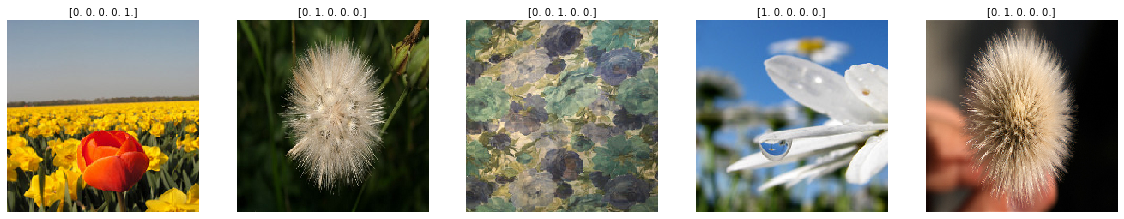

In [53]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

Confusion Matrix
[[0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 1 0 0 0]]


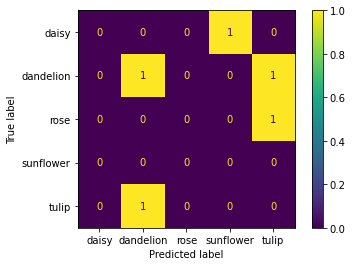

In [54]:
y_test_arg=np.argmax(test_labels,axis=1)
Y_pred = np.argmax(model.predict(test_batches, steps=1,verbose=0),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
print(cm)
labels = ['daisy', 'dandelion','rose','sunflower','tulip']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [58]:
test_loss,test_acc = model.evaluate(test_imgs, test_labels)
print("Test loss on 10 000 test samples:", test_loss)
print("Validation accuracy on test samples", test_acc)

1/1 [==============================] - 1s 553ms/step - loss: 0.8109 - accuracy: 0.6000
Test loss on 10 000 test samples: 0.810904860496521
Validation accuracy on test samples 0.6000000238418579
